O QUE SÃO CONVOLUÇÕES?

Uma convolução é um filtro que passa por uma imagem, processa e extrai elementos importantes.

Digamos que você tenha a imagem de uma pessoa usando um tênis. Como você detectaria a presença de um tênis na imagem? Para que seu programa "veja" a imagem como um tênis, você precisará extrair os elementos importantes e desfocar os recursos não essenciais. Isso é chamado de mapeamento de recursos.

Em teoria, o processo de mapeamento de recursos é simples. Você digitalizará cada pixel da imagem e analisará seus pixels vizinhos. Multiplique os valores desses pixels pelos pesos equivalentes em um filtro.

Exemplo:

Nesse caso, é especificada uma matriz de convolução 3 x 3, ou kernel de imagem.

O valor atual do pixel é 192. 

Você pode calcular o valor do novo pixel analisando os valores vizinhos, multiplicando-os pelos valores especificados no filtro e fazendo com que o novo valor seja o valor final.

VAMOS PROGRAMAR UMA REDE NEURAL CONVOLUCIONAL

In [27]:
# import cv2
import numpy as np
from scipy import misc

i = misc.ascent()

C:\Users\saulo\AppData\Local\Temp\ipykernel_4108\1313719322.py:5: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  i = misc.ascent()


Vamos ver a figura!

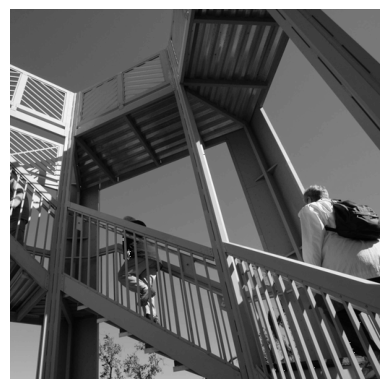

In [44]:
import matplotlib.pyplot as plt

plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

Podemos ver que a imagem é uma escada.

Existem vários recursos que você pode experimentar e isolar. Por exemplo, há linhas verticais fortes.

A imagem é armazenada como uma matriz NumPy, então podemos criar a imagem transformada apenas copiando essa matriz.

As variáveis size_x e size_y conterão as dimensões da imagem para que você possa repeti-la mais tarde.

In [36]:
i_transformed = np.copy(i)

size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]


CRIAÇÃO DE UMA MATRIZ DE CONVOLUÇÃO

Primeiro, vamos criar uma matriz de convolução (ou kernel) como uma matriz 3x3:

In [51]:
# Este filtro detecta bem as bordas
# Cria um filtro que passa apenas por arestas vivas e linhas retas.
# Experimente valores diferentes para obter efeitos divertidos.

# filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]] 

# Mais alguns filtros para experimentar por diversão!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# Se todos os dígitos no filtro não somarem 0 ou 1, você
# provavelmente devera fazer um peso (weight) para conseguir isso.
# Então, por exemplo, se seus pesos forem 1,1,1 1,2,1 1,1,1
# Eles somam 10, então você definiria um peso de 0,1 se quiser normalizá-los
weight = 1

Agora, vamos calcular os pixels de saída. 

Itere na imagem, deixando uma margem de 1 pixel e multiplique cada um dos vizinhos do pixel atual pelo valor definido no filtro.

Isso significa que o vizinho do pixel atual acima e à esquerda será multiplicado pelo item superior esquerdo no filtro.

Em seguida, multiplique o resultado pelo peso e verifique se ele está no intervalo de 0 a 255.

Por fim, carregue o novo valor na imagem transformada:

In [52]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      output_pixel = 0.0
      output_pixel = output_pixel + (i[x - 1, y-1] * filter[0][0])
      output_pixel = output_pixel + (i[x, y-1] * filter[0][1])
      output_pixel = output_pixel + (i[x + 1, y-1] * filter[0][2])
      output_pixel = output_pixel + (i[x-1, y] * filter[1][0])
      output_pixel = output_pixel + (i[x, y] * filter[1][1])
      output_pixel = output_pixel + (i[x+1, y] * filter[1][2])
      output_pixel = output_pixel + (i[x-1, y+1] * filter[2][0])
      output_pixel = output_pixel + (i[x, y+1] * filter[2][1])
      output_pixel = output_pixel + (i[x+1, y+1] * filter[2][2])
      output_pixel = output_pixel * weight
      if(output_pixel<0):
        output_pixel=0
      if(output_pixel>255):
        output_pixel=255
      i_transformed[x, y] = output_pixel

ANALISANDO OS RESULTADOS

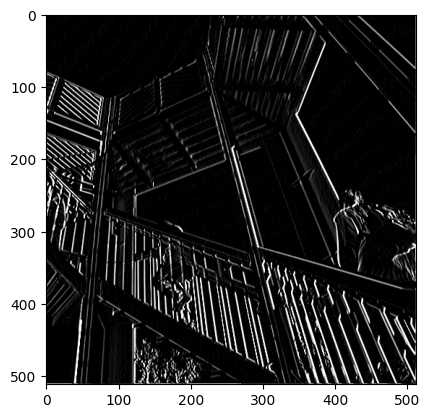

In [53]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()   

Considere os valores de filtro a seguir e o impacto deles na imagem.

O uso de [-1,0,1,-2,0,2,-1,0,1] fornece um conjunto muito forte de linhas verticais:




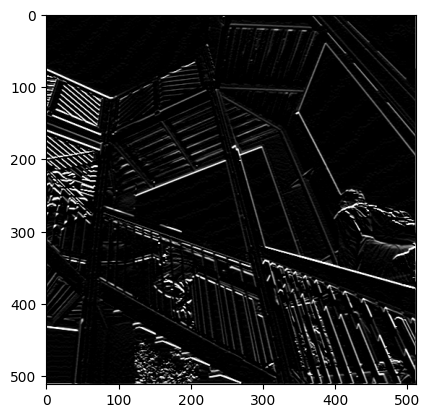

In [54]:
filter = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
weight = 1

for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      output_pixel = 0.0
      output_pixel = output_pixel + (i[x - 1, y-1] * filter[0][0])
      output_pixel = output_pixel + (i[x, y-1] * filter[0][1])
      output_pixel = output_pixel + (i[x + 1, y-1] * filter[0][2])
      output_pixel = output_pixel + (i[x-1, y] * filter[1][0])
      output_pixel = output_pixel + (i[x, y] * filter[1][1])
      output_pixel = output_pixel + (i[x+1, y] * filter[1][2])
      output_pixel = output_pixel + (i[x-1, y+1] * filter[2][0])
      output_pixel = output_pixel + (i[x, y+1] * filter[2][1])
      output_pixel = output_pixel + (i[x+1, y+1] * filter[2][2])
      output_pixel = output_pixel * weight
      if(output_pixel<0):
        output_pixel=0
      if(output_pixel>255):
        output_pixel=255
      i_transformed[x, y] = output_pixel

# plot
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()   

O uso de [-1,-2,-1,0,0,0,1,2,1] fornece linhas horizontais:



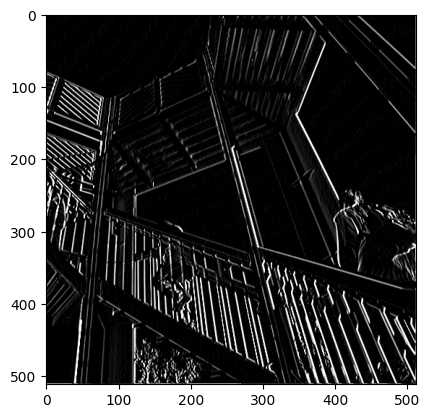

In [55]:
filter = [[-1,-2,-1], [0, 0, 0], [1,2,1]]
weight = 1

for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      output_pixel = 0.0
      output_pixel = output_pixel + (i[x - 1, y-1] * filter[0][0])
      output_pixel = output_pixel + (i[x, y-1] * filter[0][1])
      output_pixel = output_pixel + (i[x + 1, y-1] * filter[0][2])
      output_pixel = output_pixel + (i[x-1, y] * filter[1][0])
      output_pixel = output_pixel + (i[x, y] * filter[1][1])
      output_pixel = output_pixel + (i[x+1, y] * filter[1][2])
      output_pixel = output_pixel + (i[x-1, y+1] * filter[2][0])
      output_pixel = output_pixel + (i[x, y+1] * filter[2][1])
      output_pixel = output_pixel + (i[x+1, y+1] * filter[2][2])
      output_pixel = output_pixel * weight
      if(output_pixel<0):
        output_pixel=0
      if(output_pixel>255):
        output_pixel=255
      i_transformed[x, y] = output_pixel

# plot
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()   

Vale destacar que é possível usar filtros de tamanhos diferentes tais como 5 x 5 ou 7 x 7.



ENTENDENDO O POOL

Agora que foi identificado os recursos essenciais da imagem, o que fazer? Como usar o mapa de recursos resultante para classificar imagens?

Assim como as convoluções, o *pooling* ajuda na detecção de recursos. As camadas de pool reduzem a quantidade total de informações em uma imagem e mantêm os recursos detectados como presente.

Há vários tipos diferentes de pool, mas você usará um que chama de pool máximo (máximo).

Itere na imagem e, em cada ponto, considere o pixel e seus vizinhos imediatos para a direita, abaixo e abaixo dele. Use a maior delas (portanto, o *pool max*) e carregue-a na nova imagem. Assim, a nova imagem terá um quarto do tamanho da antiga.

![alt text](https://developers.google.com/static/codelabs/tensorflow-3-convolutions/img/6029904d82700d8e.png?hl=pt-br)

CODANDO O POLLING


O código a seguir mostra um pooling (2, 2).

Ao executa-lo, note que a imagem tenha um quarto do tamanho do original (reparar os eixos), mas todos os recursos foram mantidos.

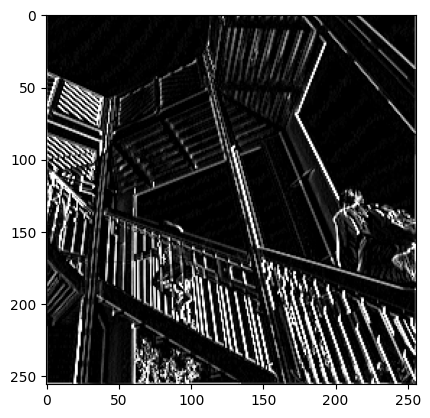

In [59]:
new_x = int(size_x/2)
new_y = int(size_y/2)

newImage = np.zeros((new_x, new_y))

for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()

----------------------------------------------FIM--------------------------------------